#**DURG CLASSIFICATION**

###**Importing and reading data**

In [ ]:
import pandas as pd
import numpy as np # linear Algebraimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
from scipy import stats

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATA science Task and Projects/Wine Quality Data Set analysis/Projects/drug200.csv")

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


###**EDA**

In [ ]:
df.shape

(200, 6)

In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
#Viewing unique label in each column
for i in df.columns:
    print(i)
    print (df[i].unique())
    print("\n\n")

Age
[23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]



Sex
['F' 'M']



BP
['HIGH' 'LOW' 'NORMAL']



Cholesterol
['HIGH' 'NORMAL']



Na_to_K
[25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127

####**Categorical Columns**

In [ ]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

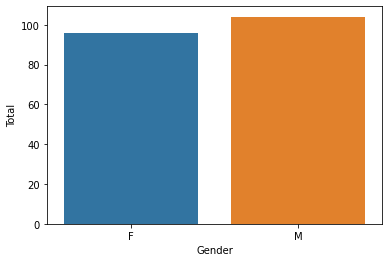

In [ ]:
sns.countplot(x="Sex", data=df)
plt.xlabel('Gender')
plt.ylabel('Total')
plt.show()

In [ ]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

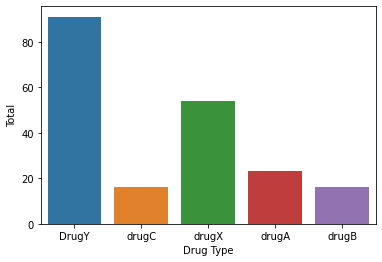

In [ ]:
sns.countplot(x="Drug", data=df)
plt.xlabel('Drug Type')
plt.ylabel('Total')
plt.show()

In [ ]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

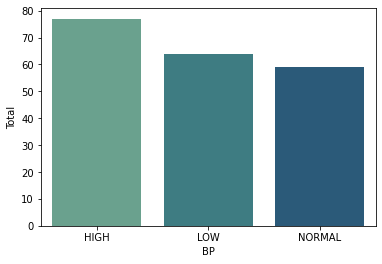

In [ ]:
sns.countplot(x="BP", data=df,palette="crest" )
plt.xlabel('BP')
plt.ylabel('Total')
plt.show()

In [ ]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

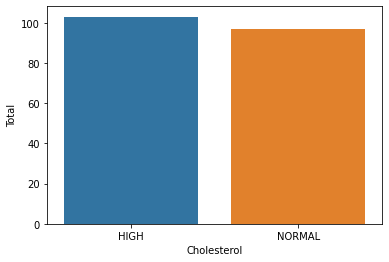

In [ ]:
sns.countplot(x="Cholesterol", data=df)
plt.xlabel('Cholesterol')
plt.ylabel('Total')
plt.show()

####**Numerical**

In [ ]:
#statistical summary
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
90%,67.100000,27.051400
95%,70.100000,30.623900
99%,74.000000,35.654490


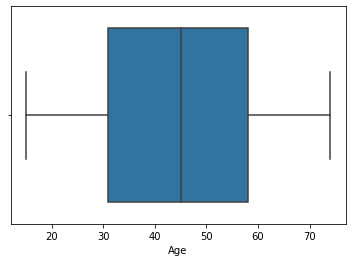

In [ ]:
sns.boxplot(df['Age'])

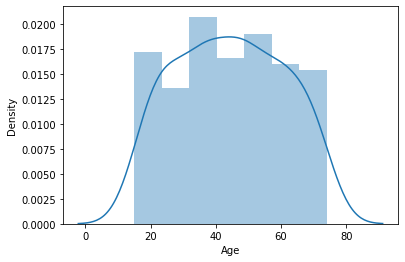

In [ ]:
sns.distplot(df['Age'])

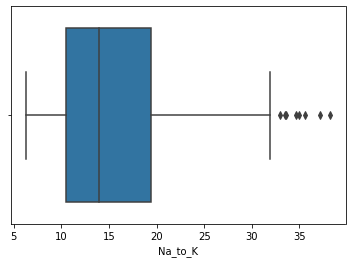

In [ ]:
sns.boxplot(df['Na_to_K'])

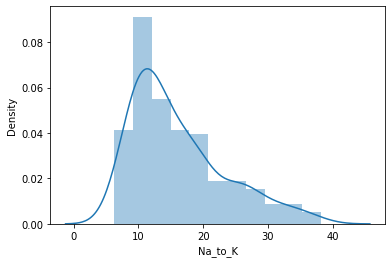

In [ ]:
sns.distplot(df['Na_to_K'])

* Distribution of Age column is symmetrical and distribution of Na_to_k is skewed

###**Data Visualization**

* Here we will study the relation between diff factors and type of drug

#####**Relation between "Drug" and "Age"**

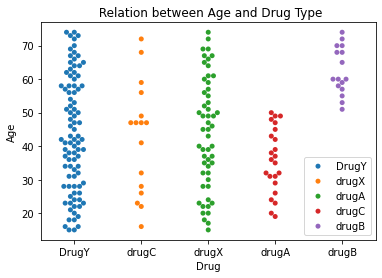

In [ ]:
sns.swarmplot(x = "Drug", y = "Age",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title(" Relation between Age and Drug Type")
plt.show()

In [ ]:
print("Minimum Age of DrugB ",df.Age[df.Drug == "drugB"].min())
print("Maximum Age of DrugA",df.Age[df.Drug == "drugA"].max())

Minimum Age of DrugB  51
Maximum Age of DrugA 50


**Inferences**
* DrugY  and drug X is consumed by peoples of all age groups
* drugA is  consumed by peoples with young age near to range of 50
* drugB is for old age peoples.
* drug C is distributed unevenly.

#####**Relation between Drug and Sex**

In [ ]:
#Both Drug and Sex are categorical in Nature, so difficult to compare, 
#so we try to find count of male and female for each Drug type

df_SexDrug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_SexDrug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


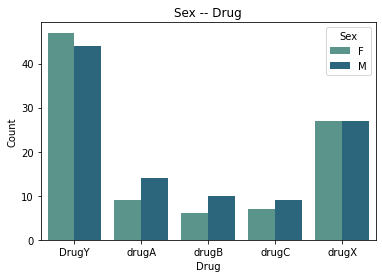

In [ ]:
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_SexDrug,palette="crest")
plt.title("Sex -- Drug")
plt.show()



#Below chart shows "sex does not  play an important role in Drug classification"

#####**Relation between Drug and BP**

In [ ]:
#Both Drug and BP are categorical in Nature, so difficult to compare, 
#so we try to find count of male and female for each Drug type

df_BPDrug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BPDrug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


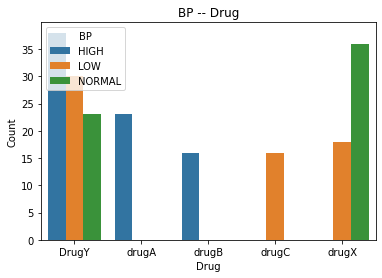

In [ ]:
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BPDrug)
plt.title("BP -- Drug")
plt.show()

**Inferences**
* drug A and drugB and DrugY Are for high BP patients.
* drug C us for for Low BP patients
* Normal Age patients only has Drug Y and Drug X

#####**Realtion Between Drug and Na_to_K**

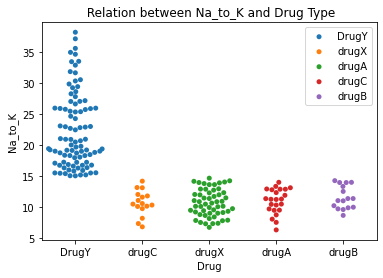

In [ ]:
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title(" Relation between Na_to_K and Drug Type")
plt.show()

In [ ]:
print("Minimum Na_to_K for DrugY:",df.Na_to_K[df.Drug == "DrugY"].min())

Minimum Na_to_K for DrugY: 15.015


In [ ]:
print("Maximum Na_to_K for drugC:",df.Na_to_K[df.Drug == "drugC"].max())

print("Maximum Na_to_K for drugX:",df.Na_to_K[df.Drug == "drugX"].max())

print("Maximum Na_to_K for drugA:",df.Na_to_K[df.Drug == "drugA"].max())

print("Maximum Na_to_K for drugB:",df.Na_to_K[df.Drug == "drugB"].max())

Maximum Na_to_K for drugC: 14.16
Maximum Na_to_K for drugX: 14.642
Maximum Na_to_K for drugA: 13.972
Maximum Na_to_K for drugB: 14.239


**Inferences**
* Drug Y is only for patients with high Na_to_K
* Other Drugs are for low range of Na_to_K

###**Feature Engineering**

######**Dealing with Categorical Cols**

Label Encoding

In [ ]:
#Label Encoding - Converting Object to Int64

from sklearn.preprocessing import LabelEncoder

In [ ]:
#objects cols
cols=["Sex","BP","Cholesterol"]

#encoding cols
for i in cols:
   le=LabelEncoder()
   df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


Data Bining

In [ ]:
#Bining Age Column

bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df= df.drop(['Age'], axis = 1)

In [ ]:
#Bining Na_to_K column

#bins
bin_NatoK = [0,5, 10, 15, 50]

#labels
category_NatoK = ['<5', '5-10', '10-15', '>15']

#Adding binned Column
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)


#dropping original column
df = df.drop(['Na_to_K'], axis = 1)

In [ ]:
#viewing

df.head()

,Sex,BP,Cholesterol,Drug,Age_binned,Na_to_K_binned
0,0,0,0,DrugY,20s,>15
1,1,1,0,drugC,40s,10-15
2,1,1,0,drugC,40s,10-15
3,0,2,0,drugX,20s,5-10
4,0,1,0,DrugY,60s,>15


In [ ]:
#getting dummies for "Age_binned" And "Na_to_K_binned"

dumCols=["Age_binned","Na_to_K_binned"]

#loop
for i in dumCols:
    dummies = pd.get_dummies(df[i], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(i))
    df.drop(i, axis=1, inplace=True)
    df = df.join(dummies)


#view
df.head()

,Sex,BP,Cholesterol,Drug,Age_binned#<20s,Age_binned#20s,Age_binned#30s,Age_binned#40s,Age_binned#50s,Age_binned#60s,Age_binned#>60s,Na_to_K_binned#<5,Na_to_K_binned#5-10,Na_to_K_binned#10-15,Na_to_K_binned#>15
0,0,0,0,DrugY,0,1,0,0,0,0,0,0,0,0,1
1,1,1,0,drugC,0,0,0,1,0,0,0,0,0,1,0
2,1,1,0,drugC,0,0,0,1,0,0,0,0,0,1,0
3,0,2,0,drugX,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,DrugY,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
df.corr()

,Sex,BP,Cholesterol,Age_binned#<20s,Age_binned#20s,Age_binned#30s,Age_binned#40s,Age_binned#50s,Age_binned#60s,Age_binned#>60s,Na_to_K_binned#<5,Na_to_K_binned#5-10,Na_to_K_binned#10-15,Na_to_K_binned#>15
Sex,1.000000,-0.007814,-0.008811,-0.052255,-0.057946,-0.083508,0.108167,-0.058239,0.091725,0.050339,NaN,0.159189,-0.061071,-0.066724
BP,-0.007814,1.000000,-0.137552,-0.100685,0.050569,-0.073362,-0.009018,0.081675,0.064558,-0.070023,NaN,0.146470,-0.033271,-0.083418
Cholesterol,-0.008811,-0.137552,1.000000,0.091836,-0.104661,0.130242,0.040038,-0.107948,0.040388,-0.093541,NaN,0.065540,-0.050910,-0.002712
Age_binned#<20s,-0.052255,-0.100685,0.091836,1.000000,-0.116360,-0.120370,-0.122362,-0.112308,-0.110264,-0.066614,NaN,-0.015027,-0.055438,0.065110
Age_binned#20s,-0.057946,0.050569,-0.104661,-0.116360,1.000000,-0.219432,-0.223062,-0.204734,-0.201008,-0.121435,NaN,0.011740,-0.039187,0.028407
Age_binned#30s,-0.083508,-0.073362,0.130242,-0.120370,-0.219432,1.000000,-0.230750,-0.211790,-0.207935,-0.125620,NaN,0.031839,-0.003633,-0.021592
Age_binned#40s,0.108167,-0.009018,0.040038,-0.122362,-0.223062,-0.230750,1.000000,-0.215295,-0.211375,-0.127698,NaN,-0.039636,0.093490,-0.058611
Age_binned#50s,-0.058239,0.081675,-0.107948,-0.112308,-0.204734,-0.211790,-0.215295,1.000000,-0.194008,-0.117206,NaN,-0.043608,0.036174,-0.000406
Age_binned#60s,0.091725,0.064558,0.040388,-0.110264,-0.201008,-0.207935,-0.211375,-0.194008,1.000000,-0.115072,NaN,-0.002781,-0.010261,0.012051
Age_binned#>60s,0.050339,-0.070023,-0.093541,-0.066614,-0.121435,-0.125620,-0.127698,-0.117206,-0.115072,1.000000,NaN,0.079101,-0.068452,0.003462


In [ ]:
df.isnull().sum()

Sex                     0
BP                      0
Cholesterol             0
Drug                    0
Age_binned#<20s         0
Age_binned#20s          0
Age_binned#30s          0
Age_binned#40s          0
Age_binned#50s          0
Age_binned#60s          0
Age_binned#>60s         0
Na_to_K_binned#<5       0
Na_to_K_binned#5-10     0
Na_to_K_binned#10-15    0
Na_to_K_binned#>15      0
dtype: int64

####**Creating Target  Variable and Feature Vector**

In [ ]:
X = df.drop(["Drug"], axis=1)  #feature variable
y = df["Drug"]   #target variable

######**Checking Multicollinearity using VIF**

In [ ]:
X.columns

Index(['Sex', 'BP', 'Cholesterol', 'Age_binned#<20s', 'Age_binned#20s',
       'Age_binned#30s', 'Age_binned#40s', 'Age_binned#50s', 'Age_binned#60s',
       'Age_binned#>60s', 'Na_to_K_binned#<5', 'Na_to_K_binned#5-10',
       'Na_to_K_binned#10-15', 'Na_to_K_binned#>15'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = df[['Sex', 'BP', 'Cholesterol', 'Age_binned#<20s', 'Age_binned#20s',
       'Age_binned#30s', 'Age_binned#40s', 'Age_binned#50s', 'Age_binned#60s',
       'Age_binned#>60s', 'Na_to_K_binned#<5', 'Na_to_K_binned#5-10',
       'Na_to_K_binned#10-15', 'Na_to_K_binned#>15' ]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.064460,Sex
1,1.078707,BP
2,1.081178,Cholesterol
3,inf,Age_binned#<20s
4,inf,Age_binned#20s
5,inf,Age_binned#30s
6,inf,Age_binned#40s
7,inf,Age_binned#50s
8,inf,Age_binned#60s
9,inf,Age_binned#>60s


####**Splitting into training and testing  data set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.head()

,Sex,BP,Cholesterol,Age_binned#<20s,Age_binned#20s,Age_binned#30s,Age_binned#40s,Age_binned#50s,Age_binned#60s,Age_binned#>60s,Na_to_K_binned#<5,Na_to_K_binned#5-10,Na_to_K_binned#10-15,Na_to_K_binned#>15
131,1,1,1,0,0,0,0,1,0,0,0,0,0,1
96,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,0,2,0,0,0,0,0,1,0,0,0,0,1,0
19,0,0,1,0,0,1,0,0,0,0,0,0,0,1
153,0,1,1,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
y_train.head()

131    DrugY
96     DrugY
181    drugX
19     DrugY
153    drugX
Name: Drug, dtype: object

In [ ]:
#shape of training and testing test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 14)
(60, 14)
(140,)
(60,)


###**Applying Classification Techniques**

####**1.LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#applying Logistics Reg

LogReg= LogisticRegression()

#fit model with data
LogReg.fit(X_train,y_train)

#predict

y_pred=LogReg.predict(X_train)

In [ ]:
print("Accuracy on Traing DataSet",LogReg.score(X_train, y_train)*100)

Accuracy on Traing DataSet 98.57142857142858


**Checking Acc on Test Data**

In [ ]:
y_pred_lr=LogReg.predict(X_test)

In [ ]:
#calculating the accuracy on testing set
log_reg_acc = 100*LogReg.score(X_test, y_test)

print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(LogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.9667


In [ ]:
#confusion matrix
confmatrix=confusion_matrix(y_test, y_pred_lr)
print(confmatrix)

#classification report
print(classification_report(y_test, y_pred_lr))

[[30  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  2  2]
 [ 0  0  0  0 18]]
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.50      0.67         4
       drugX       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.98      0.90      0.92        60
weighted avg       0.97      0.97      0.96        60



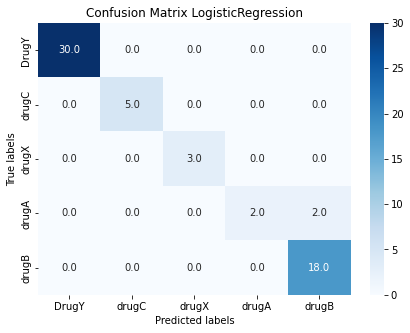

In [ ]:
#plotting a confusion matrix

labels =['DrugY','drugC','drugX','drugA','drugB']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confmatrix,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix LogisticRegression');

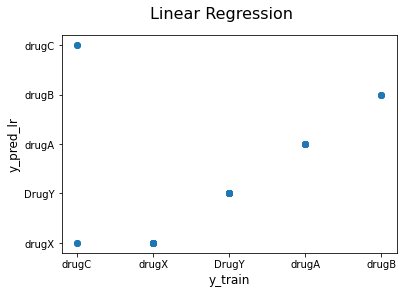

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_lr)

#title
fig.suptitle("Logistic Regression ", fontsize=16)              # Plot heading 

#axis label
plt.xlabel('y_train', fontsize=12)                          # X-label
plt.ylabel('y_pred_lr', fontsize=12)
plt.show()

**Logistic regression using cross Val Score**

In [ ]:
#logistic regression using cross Val Score
from sklearn.model_selection import cross_val_score

In [ ]:
# 10-fold cross-validation logistic regression

logregCV = LogisticRegression()

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds

scores_accuracy = cross_val_score(logregCV, X, y, cv=10, scoring='accuracy')

scores_accuracy1 = cross_val_score(logregCV, X, y, cv=10, scoring='roc_auc_ovr')

In [ ]:
print('K-fold cross-validation results:')
print(logregCV.__class__.__name__+" average accuracy with 'accuracy' scoring is %2.3f" % scores_accuracy.mean())
print(logregCV.__class__.__name__+" average accuracy with 'roc_auc_ovr' scoring is %2.3f" % scores_accuracy1.mean())

K-fold cross-validation results:
LogisticRegression average accuracy with 'accuracy' scoring is 0.975
LogisticRegression average accuracy with 'roc_auc_ovr' scoring is 0.998


####**K-Neighbors**

In [ ]:
#import knn
from sklearn.neighbors import KNeighborsClassifier


#.Create a KNN model instance with n_neighbors=1.
knn=KNeighborsClassifier(n_neighbors=1)


#Fit this KNN model to the training data.
knn.fit(X_train,y_train)

#predicting on training set to check accuracy
ypred=knn.predict(X_train)

#Accuracy on Training Set
print(100*knn.score(X_train, y_train))

100.0


**Applying On Testing Data**

In [ ]:
#Use the predict method to predict values using your KNN model and X_test

y_pred_knn=knn.predict(X_test)

In [ ]:
#confusion Matrix
print("Confusion matrix \n")
print(confusion_matrix(y_test,y_pred_knn))

#Classification Report
print("Classification Report \n")
print(classification_report(y_test,y_pred_knn))

Confusion matrix 

[[29  0  1  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  2  0  2  0]
 [ 0  2  1  0 15]]
Classification Report 

              precision    recall  f1-score   support

       DrugY       1.00      0.97      0.98        30
       drugA       0.56      1.00      0.71         5
       drugB       0.60      1.00      0.75         3
       drugC       1.00      0.50      0.67         4
       drugX       1.00      0.83      0.91        18

    accuracy                           0.90        60
   macro avg       0.83      0.86      0.80        60
weighted avg       0.94      0.90      0.91        60



**Choosing a K Value**

In [ ]:
#Choosing a K Value

#Create a for loop that trains various KNN models with different k values

In [ ]:
error_rate = []

for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

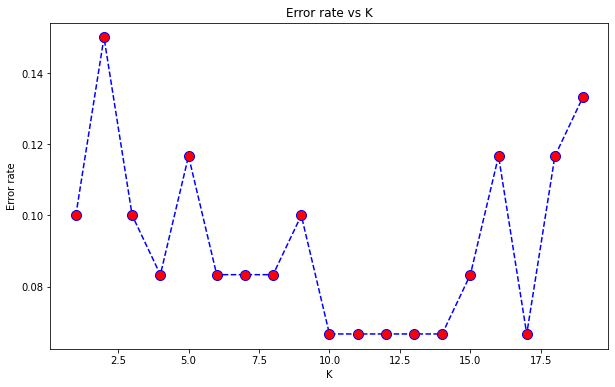

In [ ]:
#Create a plot to see how error rate varies with K value

plt.figure(figsize=(10,6))

plt.plot(range(1,20),error_rate,color='blue',linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)


#giving titile, label

plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

In [ ]:
#retrain with new K value (K=10)

knn=KNeighborsClassifier(n_neighbors=10)

#fitting
knn.fit(X_train,y_train)

#prediciting
pred=knn.predict(X_test)


#confusion matrix
print(confusion_matrix(y_test,pred))


#classification report
print(classification_report(y_test,pred))

[[30  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  2  0  2  0]
 [ 0  2  0  0 16]]
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       0.56      1.00      0.71         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.50      0.67         4
       drugX       1.00      0.89      0.94        18

    accuracy                           0.93        60
   macro avg       0.91      0.88      0.86        60
weighted avg       0.96      0.93      0.94        60



In [ ]:
#Check accuracy score 
from sklearn.metrics import accuracy_score

knn_acc = 100*knn.score(X_test, y_test)
print('Model accuracy score with K=10: {0:0.4f}'. format(accuracy_score(y_test, pred)))

Model accuracy score with K=10: 0.9333


**Cross validation for KNN with k=10**

In [ ]:
from sklearn.model_selection import cross_val_score


knn1=KNeighborsClassifier(n_neighbors=10)


#Calculate cv score with'accuracy' scoring and 10 folds.
acc1 = cross_val_score(knn1, X, y, scoring = 'accuracy',cv=10)
print('cross validation score with "accuracy" scoring =',acc1.mean())

# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
acc2 = cross_val_score(knn1, X, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with "roc_auc" scoring =',acc2.mean())

cross validation score with "accuracy" scoring = 0.89
cross validation score with "roc_auc" scoring = 0.9841958720330236


####**Random Forest Classifier**

In [ ]:
from  sklearn.ensemble  import  RandomForestClassifier

classifier_rf  =  RandomForestClassifier()

In [ ]:
classifier_rf.fit(X_train,  y_train)

RandomForestClassifier()

In [ ]:
#prediction on train data to check accuracy
y_pred_train = classifier_rf.predict(X_train)

#confusion matrix
confusion_matrix(y_train, y_pred_train)

array([[61,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0],
       [ 0,  0, 13,  0,  0],
       [ 0,  0,  0, 12,  0],
       [ 0,  0,  0,  0, 36]])

In [ ]:
score=accuracy_score(y_train,y_pred_train)*100

print('Model accuracy score with Random Forest on a training set: {0:0.4f}'. format(rm_score))

Model accuracy score with Random Forest on a training set: 100.0000


**Appying on Test Data**

In [ ]:
#prediction on test data to check accuracy
y_pred_rf = classifier_rf.predict(X_test)

In [ ]:
rm_score=accuracy_score(y_test,y_pred_rf)*100

print('Model accuracy score with Random Forest on a Testing set: {0:0.4f}'. format(rm_score))

Model accuracy score with Random Forest on a Testing set: 96.6667


In [112]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.50      0.67         4
       drugX       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.98      0.90      0.92        60
weighted avg       0.97      0.97      0.96        60



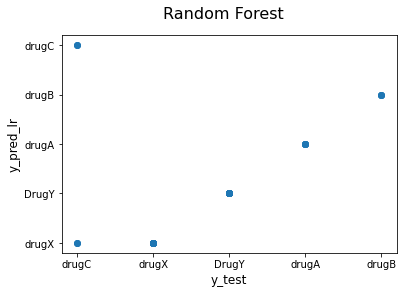

In [115]:
# Plotting y_test and y_pred_rf to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_rf)

#title
fig.suptitle("Random Forest", fontsize=16)              # Plot heading 

#axis label
plt.xlabel('y_test', fontsize=12)                          # X-label
plt.ylabel('y_pred_lr', fontsize=12)
plt.show()

####**SMOTE**
* Synthetic Minority Over-Sampling

* Since we had highly imbalanced classes, SMOTE created synthetic minority sampling to balance the samples. And trained the model as if we had balanced classes in our dataset.

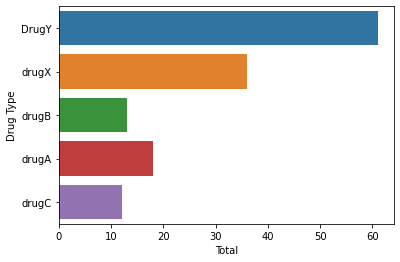

In [ ]:
#checking for class imbalance

sns.countplot(y=y_train, data=df)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

#this shows high imbalance is present.

In [ ]:
#Using SMOTE for OverSampling to avoid Overfitting


from imblearn.over_sampling import SMOTE


X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

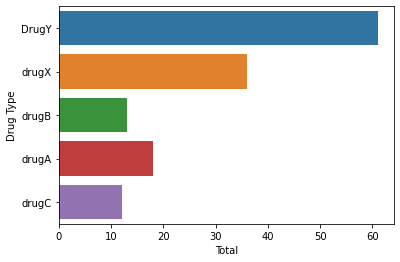

In [ ]:
sns.countplot(y=y_train, data=df)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

#now we have balance distribution of Drug type

**LogisticRegression using SMOTE**

In [ ]:
#applying Logistics Reg

LogReg_Sm= LogisticRegression()

#fit model with data
LogReg_Sm.fit(X_train_resampled,y_train_resampled)

#predict

y_pred_ls=LogReg_Sm.predict(X_test)

#calculating the accuracy
lr_smot_score=LogReg_Sm.score(X_test, y_test)

print('Accuracy of logistic regression classifier using SMOTE: {0:0.4f}'. format(lr_smot_score*100))
print('\n')


#confusion matrix
cm=confusion_matrix(y_test, y_pred_ls)
print(cm)
print('\n')

#classification report
print(classification_report(y_test, y_pred_ls))

Accuracy of logistic regression classifier using SMOTE: 100.0000


[[30  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]


              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



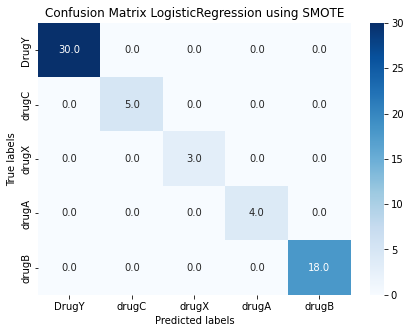

In [ ]:
#plotting a confusion matrix

labels =['DrugY','drugC','drugX','drugA','drugB']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix LogisticRegression using SMOTE');

####**Hyperparameter Optimization**

In [90]:
# Create a hyperparameter grid for LogisticRegression

In [93]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [116]:
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

In [94]:
# Set up hyperparameter search for LOgisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

In [96]:
# Fit random hyperparameter search for RandomForestClassifier
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [97]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [102]:
Hyp_score=(rs_log_reg.score(X_test, y_test)*100)
Hyp_score

96.66666666666667

* Similarly we can apply Hyperparameter Optimization technique on other methods also

###**SUMMARY**

In [109]:
pd.DataFrame(data={'Model': ['Logistic Regression', 'K-Nearest Neighbor','Random Forest', 'LogReg using SMOTE','LogReg (using HypOptm)'], 'Accuracy %': [log_reg_acc, knn_acc, rm_score,lr_smot_score*100,Hyp_score ]})

,Model,Accuracy %
0,Logistic Regression,96.666667
1,K-Nearest Neighbor,93.333333
2,Random Forest,96.666667
3,LogReg using SMOTE,100.000000
4,LogReg (using HypOptm),96.666667


In [117]:
%%shell
jupyter nbconvert --to html /content/DrugClassification.ipynb

[NbConvertApp] Converting notebook /content/DrugClassification.ipynb to html
[NbConvertApp] Writing 717163 bytes to /content/DrugClassification.html
